In [1]:
%matplotlib inline
import cv2
from PIL import Image, ImageFilter
from tesserocr import PyTessBaseAPI, RIL
from matplotlib.pyplot import imshow
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pylab import rcParams
import glob
from matplotlib.transforms import Bbox
import imutils
from tqdm import tqdm

In [2]:
rcParams['figure.figsize']

[6.0, 4.0]

In [10]:
dir(image)

['_Image__transformer',
 '__array_interface__',
 '__class__',
 '__copy__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_close_exclusive_fp_after_loading',
 '_copy',
 '_crop',
 '_dump',
 '_ensure_mutable',
 '_exclusive_fp',
 '_expand',
 '_getexif',
 '_getmp',
 '_min_frame',
 '_new',
 '_open',
 '_repr_png_',
 '_seek_check',
 '_size',
 'alpha_composite',
 'app',
 'applist',
 'bits',
 'category',
 'close',
 'convert',
 'copy',
 'crop',
 'custom_mimetype',
 'decoderconfig',
 'decodermaxblock',
 'draft',
 'effect_spread',
 'encoderconfig',
 'encoderinfo',
 'entropy',
 'filename',
 'filter',
 'format',
 'format_d

## show examples of bboxes

Found 21 textline image components.
Found 14 textline image components.
Found 19 textline image components.
Found 20 textline image components.
Found 27 textline image components.
Found 17 textline image components.
Found 13 textline image components.
Found 23 textline image components.


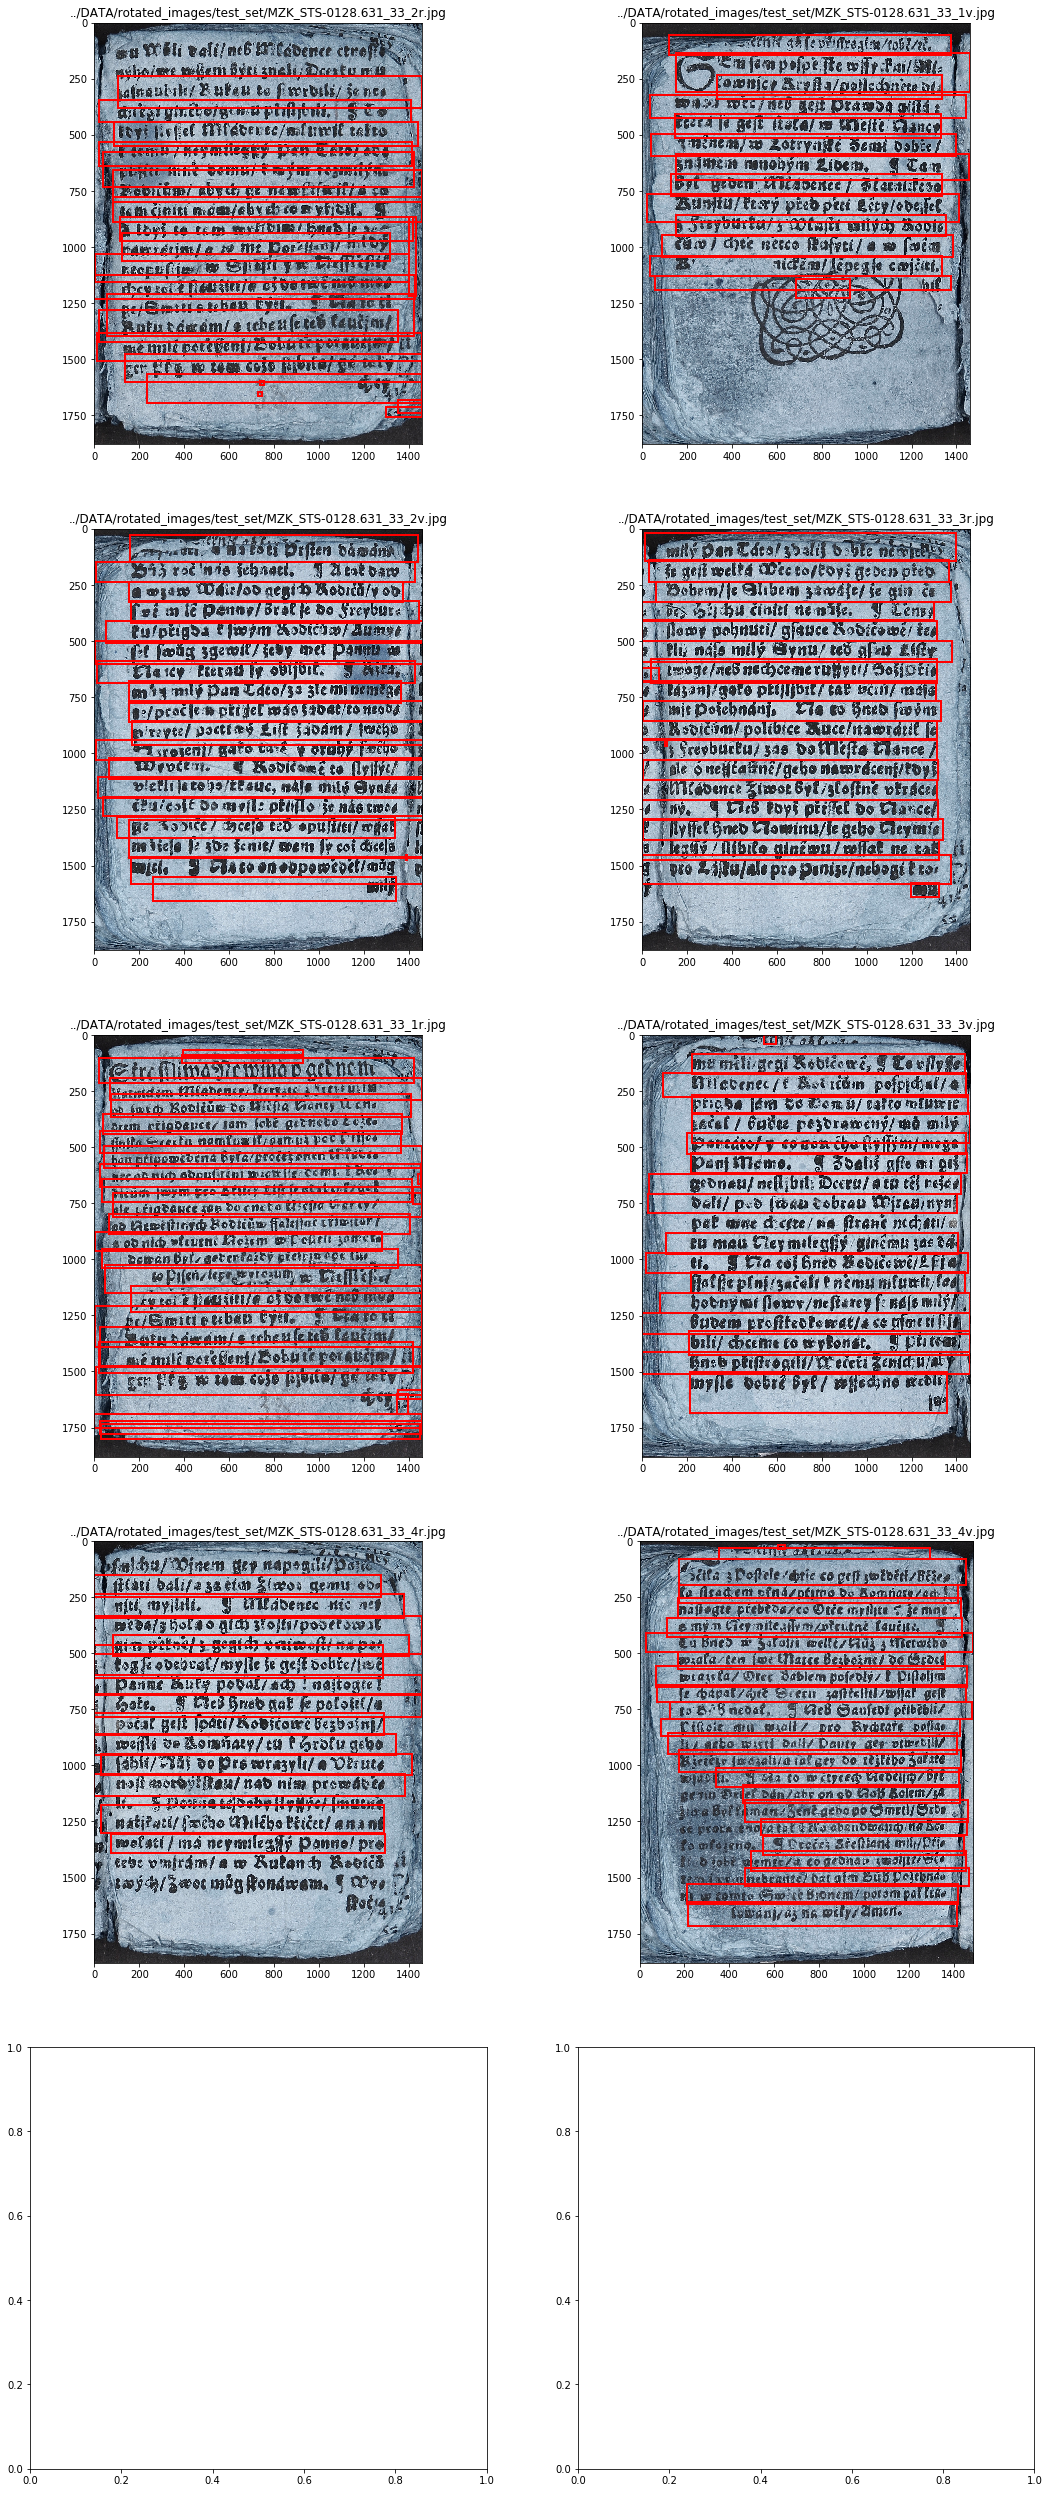

In [3]:
image_list = []
for filename in glob.glob('../DATA/rotated_images/test_set/*.jpg'):
    image_list.append(filename)
cols = 2
rows = len(image_list)//cols +1
maxsize = 9
rcParams['figure.figsize'] =  maxsize * cols,maxsize * rows


fig,axs = plt.subplots(rows,cols)
heights = []
for i,image in enumerate(image_list):
    img = cv2.imread(image)
    kernel = np.ones((3,3), np.uint8) 
    img_erosion = cv2.erode(img, kernel, iterations=1) 
    col = i % cols
    row = i//cols
    axs[row][col].imshow(img)
    axs[row][col].set_title(image)
    with PyTessBaseAPI() as api:
        api.SetImage(Image.fromarray(img_erosion))
        boxes = api.GetComponentImages(RIL.TEXTLINE, True)
        if len(boxes) == 0:
            api.SetImage(Image.fromarray(img))
            boxes = api.GetComponentImages(RIL.TEXTLINE, True)  
        print('Found {} textline image components.'.format(len(boxes)))
        for i, (im, box, _, _) in enumerate(boxes):
            heights.append(box['h'])
            rect = patches.Rectangle((box['x'],box['y']),box['w'],box['h'],linewidth=2,edgecolor='r',facecolor='none')
            axs[row][col].add_patch(rect) 

plt.show()

## get height statistics

In [121]:
image_list = []
for filename in glob.glob('../DATA/rotated_images/rotovane/*.jpg'):
    image_list.append(filename)
heights = []
num_of_components = []
for i,image in enumerate(image_list):
    img = cv2.imread(image)
    kernel = np.ones((3,3), np.uint8) 
    img_erosion = cv2.erode(img, kernel, iterations=1) 
    with PyTessBaseAPI() as api:
        api.SetImage(Image.fromarray(img_erosion))
        boxes = api.GetComponentImages(RIL.TEXTLINE, True)
        if len(boxes) == 0:
            api.SetImage(Image.fromarray(img))
            boxes = api.GetComponentImages(RIL.TEXTLINE, True)
        if len(boxes) == 0:
            print(image)
        num_of_components.append(len(boxes))
        for i, (im, box, _, _) in enumerate(boxes):
            heights.append(box['h'])

../DATA/rotated_images/rotovane/MZK_0000_542_21_2r__rot_5.0.jpg
../DATA/rotated_images/rotovane/MZK_0000_175_34_4v__rot_4.0.jpg
../DATA/rotated_images/rotovane/MZK_0000_203_12_02r__rot_-3.0.jpg
../DATA/rotated_images/rotovane/MZK_0000_316_04_2r__rot_5.0.jpg
../DATA/rotated_images/rotovane/MZK_0000_085_01_06r__rot_-4.0.jpg
../DATA/rotated_images/rotovane/MZK_0000_203_12_04v__rot_2.5.jpg
../DATA/rotated_images/rotovane/MZK_0000_542_21_7v__rot_-4.5.jpg
../DATA/rotated_images/rotovane/MZK_0000_542_21_5v__rot_-4.5.jpg
../DATA/rotated_images/rotovane/MZK_0000_203_12_02v__rot_3.5.jpg
../DATA/rotated_images/rotovane/MZK_0000_542_21_7v__rot_5.0.jpg
../DATA/rotated_images/rotovane/MZK_0000_175_34_7r__rot_-2.5.jpg
../DATA/rotated_images/rotovane/MZK_0000_203_12_01r__rot_-3.0.jpg
../DATA/rotated_images/rotovane/MZK_0000_085_01_05r__rot_-3.5.jpg
../DATA/rotated_images/rotovane/MZK_0000_085_01_06r__rot_-5.0.jpg
../DATA/rotated_images/rotovane/MZK_0000_316_04_1v__rot_-5.0.jpg
../DATA/rotated_images/r

## plot histograms

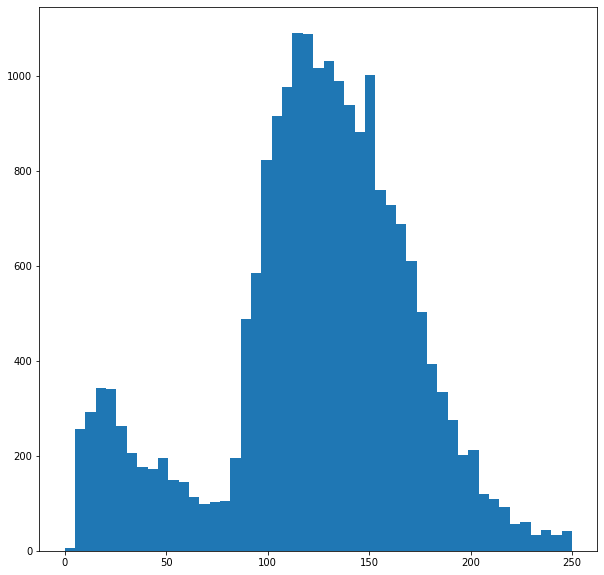

In [122]:
# histogram of heights
rcParams['figure.figsize'] = 10,10
n, bins, patches = plt.hist(heights,bins = np.linspace(0,250))

plt.show()

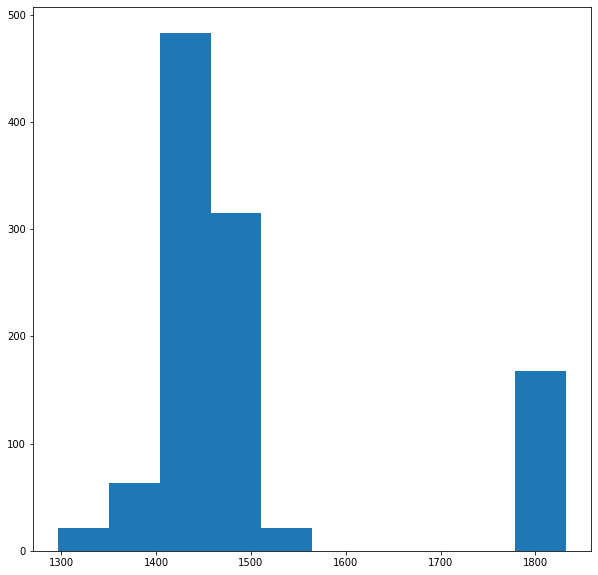

In [124]:
# histogram of image widths
im_widths = []
for i,image in enumerate(image_list):
    img = cv2.imread(image)
    height, width, channels = img.shape
    im_widths.append(width)
n, bins, patches = plt.hist(im_widths)
plt.show()

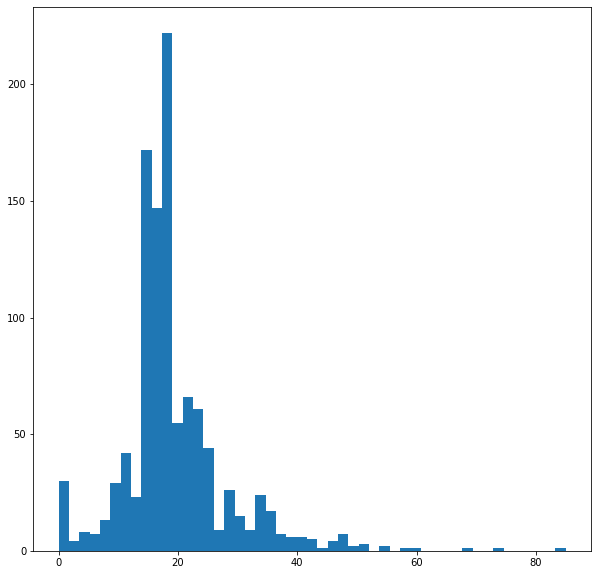

In [125]:
# histogram of components
n, bins, patches = plt.hist(num_of_components,np.linspace(0,np.max(num_of_components)))
plt.show()

In [7]:
image_list = []
for filename in glob.glob('../DATA/rotated_images/test_set/*.jpg'):
    image_list.append(filename)
heights = []
num_of_components = []

resize_widhts = 1400
crop_width = 1000
crop_height = 180
crop_padding = (resize_widhts-crop_width)//2

def notABox(box):
    # we don't want small boxes. They are usually random image patches.
    if box['w']<300 or box['h']<90:
        return True
    #top or bottom boxes should be excluded. They mark page border usually/
    if box['y']<300 or box['y']>1500:
        return True
    else: return False

for i,image in tqdm(enumerate(image_list)):
    image_name = image.split('/')[-1]
    img = cv2.imread(image)
    img = imutils.resize(img, width=1400)
    kernel = np.ones((3,3), np.uint8) 
    img_erosion = cv2.erode(img, kernel, iterations=1) 
    with PyTessBaseAPI() as api:
        api.SetImage(Image.fromarray(img_erosion))
        boxes = api.GetComponentImages(RIL.TEXTLINE, True)
        if len(boxes) == 0:
            api.SetImage(Image.fromarray(img))
            boxes = api.GetComponentImages(RIL.TEXTLINE, True)
        if len(boxes) == 0:
            print(image)
        for i, (im, box, _, _) in enumerate(boxes):
            if notABox(box):
                continue
            x,y,w,h = box['x'],box['y'],box['w'],box['h']
            crop_y = (y+h//2) - crop_height//2
            crop_img = img[crop_y:crop_y + crop_height, crop_padding:crop_padding+crop_width]
            cv2.imwrite(f'../DATA/rotated_images/cropped_test_set/{i}{image_name}',crop_img)

3it [00:01,  1.66it/s]


In [9]:
image_list = []
output_folder = '../DATA/rotated_images/cropped_test_set_bw/'
for filename in glob.glob('../DATA/rotated_images/cropped_test_set/*.jpg'):
    image_list.append(filename)
for i,image_path in tqdm(enumerate(image_list)):
    image_name = image_path.split('/')[-1]
    image=Image.open(image_path)

    with PyTessBaseAPI() as api:
            api.SetImage(image)
            thresholded = api.GetThresholdedImage()
            thresholded.save(output_folder+image_name)
            


40it [00:04,  8.67it/s]


Found 20 textline image components.


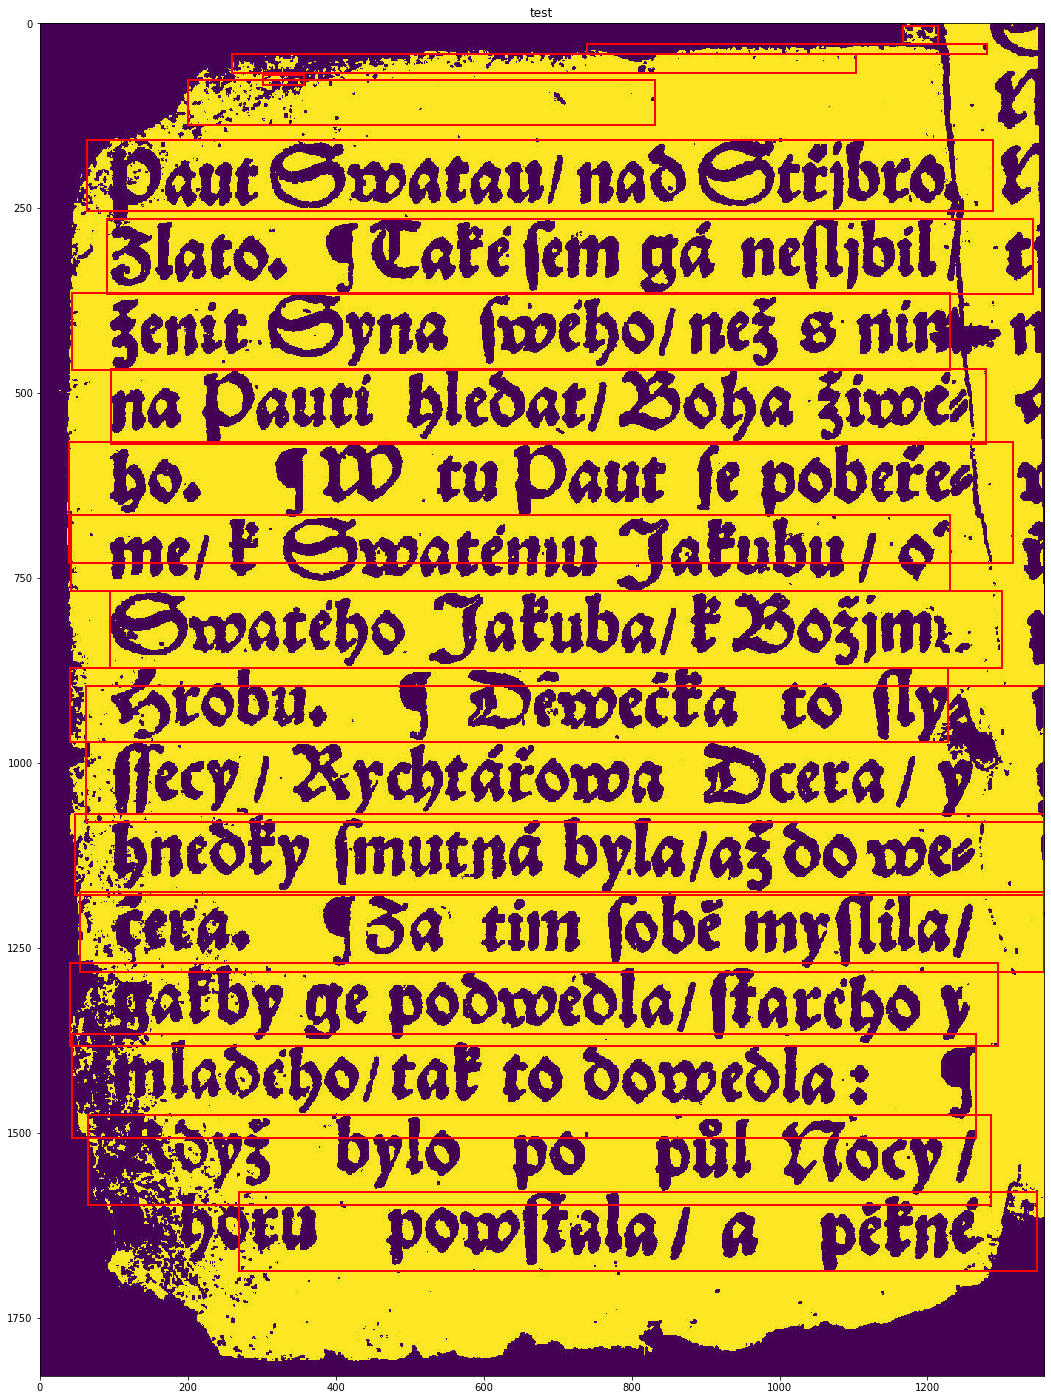

In [112]:
fig,axs = plt.subplots(1,1)
image=Image.open('/home/jan/projects/IRAFM/medieval_OCR/DATA/rotated_images/TEST/MZK_0000_085_01_02v__rot_0.0.jpg')
image = image.rotate(0.1)
#img = cv2.imread('/home/jan/projects/IRAFM/medieval_OCR/DATA/rotated_images/TEST/MZK_0000_085_01_02v__rot_8.jpg', 0) 
#x,y,w,h = 50,50,1000,1000
#img = img[y:y+h, x:x+w]
#img = img[y:y+h, x:x+w]

image = np.asarray(image) 
img = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

kernel = np.ones((3,3), np.uint8) 
img_erosion = cv2.erode(img, kernel, iterations=1) 
#image = image.filter(ImageFilter.GaussianBlur(0.1))
axs.set_title('test')
with PyTessBaseAPI() as api:
        api.SetImage(Image.fromarray(img_erosion))
        thresholded = api.GetThresholdedImage()
        npimage = np.asarray(thresholded) 
        axs.imshow(npimage)
        #api.SetImage(thresholded)
        boxes = api.GetComponentImages(RIL.TEXTLINE, True)
        print('Found {} textline image components.'.format(len(boxes)))
        for i, (im, box, _, _) in enumerate(boxes):
            rect = patches.Rectangle((box['x'],box['y']),box['w'],box['h'],linewidth=2,edgecolor='r',facecolor='none')
            axs.add_patch(rect) 


plt.show()

In [25]:
dir(api)

['AdaptToWordStr',
 'AllWordConfidences',
 'AllWords',
 'AnalyseLayout',
 'Clear',
 'ClearAdaptiveClassifier',
 'ClearPersistentCache',
 'DetectOS',
 'DetectOrientationScript',
 'End',
 'GetAvailableLanguages',
 'GetBoolVariable',
 'GetBoxText',
 'GetComponentImages',
 'GetConnectedComponents',
 'GetDatapath',
 'GetDoubleVariable',
 'GetHOCRText',
 'GetInitLanguagesAsString',
 'GetIntVariable',
 'GetIterator',
 'GetLoadedLanguages',
 'GetPageSegMode',
 'GetRegions',
 'GetStringVariable',
 'GetStrips',
 'GetTSVText',
 'GetTextDirection',
 'GetTextlines',
 'GetThresholdedImage',
 'GetThresholdedImageScaleFactor',
 'GetUNLVText',
 'GetUTF8Text',
 'GetUnichar',
 'GetVariableAsString',
 'GetWords',
 'Init',
 'InitForAnalysePage',
 'InitFull',
 'IsValidCharacter',
 'MapWordConfidences',
 'MeanTextConf',
 'ProcessPage',
 'ProcessPages',
 'ReadConfigFile',
 'Recognize',
 'RecognizeForChopTest',
 'SetDebugVariable',
 'SetImage',
 'SetImageBytes',
 'SetImageFile',
 'SetOutputName',
 'SetPageSegM

In [56]:
api.GetComponentImages()

TypeError: GetComponentImages() takes at least 2 positional arguments (0 given)

In [72]:

def full_extent(ax, pad=0.0):
    """Get the full extent of an axes, including axes labels, tick labels, and
    titles."""
    # For text objects, we need to draw the figure first, otherwise the extents
    # are undefined.
    ax.figure.canvas.draw()
    items = ax.get_xticklabels() + ax.get_yticklabels() 
#    items += [ax, ax.title, ax.xaxis.label, ax.yaxis.label]
    items += [ax, ax.title]
    bbox = Bbox.union([item.get_window_extent() for item in items])

    return bbox.expanded(1.0 + pad, 1.0 + pad)
extent = full_extent(axs[0][0]).transformed(fig.dpi_scale_trans.inverted())
fig.savefig('ax2_figure.png', bbox_inches=extent)


In [73]:
import os

In [74]:
import os
os.makedirs("results",exist_ok=True)
ix = 0
for i in axs:
    for j in i:
        extent = full_extent(j).transformed(fig.dpi_scale_trans.inverted())
        fig.savefig("results/" + str(ix) + '.png', bbox_inches=extent)
        ix += 1
